# Import needed libraries

In [59]:
# python library to perform numeric operations on numpy arrays
import numpy as np

# python library to process dataframe and do analysis on them
import pandas as pd

# !pip install xlrd
# python library to deal with excel files
import xlrd

# python library for visualisation
from matplotlib import pyplot as plt

Skip the first 7 rows of the file

these rows contain info about:
    
when the datafile was downloaded

who it was created for

the total raised: empty - what does this mean???
    
Min: 6m - what does this mean???
    
Startups who have headquarters in Europe

These startups are backed by Venture Capitalist

What does Ownership status mean? Especially privately held

All these startups were founded from 2012 onwards

In [38]:
# Using the Pandas python library
# Load the excel datafile
# Located in the data directory which is one directory above hence the ..

data_path = '../data/PitchBook_All_Columns_2017_09_11_08_42_13.xlsx'
pitchbk_data = pd.read_excel(data_path, skiprows=7)

In [42]:
# Display a verbose description of the dataset
# This includes number of columns, datatype of each column, how much memory the file takes up

pitchbk_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 130 columns):
Company ID                             object
Company Name                           object
Company Former Name                    object
Company Also Known As                  object
PBId                                   object
Description                            object
Primary Industry Sector                object
Primary Industry Group                 object
Primary Industry Code                  object
All Industries                         object
Industry Vertical                      object
Company Financing Status               object
Total Raised                           float64
Business Status                        object
Ownership Status                       object
Universe                               object
Website                                object
Employees                              float64
Exchange                               float64
Ticker           

Here, the Pitchbook data says that there are 503 rows (entries), indexed from 0 to 502.
In addition, there are 130 columns of different datatypes (many objects like strings (ie phrases or names), a good number of numeric values (floats) and a couple date and time formatted columns). 

The result of this information implies that some cleaning and encoding of the dataset will need to be done to present it in an effective structure for the Machine Learning algorithms later on.

Finally, the dataset takes up ~500 KB (1/2 a Gigabyte).

In [29]:
# Display the dimension of the dataframe 
# which from the info above should be 503 rows and 130 columns

pitchbk_data.shape

(503, 130)

(503,130) indicates that there are 503 startups in the dataframe and 130 attributes/features about each startup.

In [48]:
# Display column/attribute names
pitchbk_data.columns.values

array([u'Company ID', u'Company Name', u'Company Former Name',
       u'Company Also Known As', u'PBId', u'Description',
       u'Primary Industry Sector', u'Primary Industry Group',
       u'Primary Industry Code', u'All Industries', u'Industry Vertical',
       u'Company Financing Status', u'Total Raised', u'Business Status',
       u'Ownership Status', u'Universe', u'Website', u'Employees',
       u'Exchange', u'Ticker', u'Year Founded', u'Parent Company',
       u'Daily Updates', u'Weekly Updates', u'Revenue', u'Gross Profit',
       u'Net Income', u'Enterprise Value', u'EBITDA', u'Fiscal Period',
       u'Primary Contact PBId', u'Primary Contact',
       u'Primary Contact Title', u'Primary Contact Email',
       u'Primary Contact Phone', u'HQ Location', u'HQ Address Line 1',
       u'HQ Address Line 2', u'HQ City', u'HQ State/Province',
       u'HQ Post Code', u'HQ Country', u'HQ Phone', u'HQ Fax', u'HQ Email',
       u'HQ Global Region', u'HQ Global Sub Region',
       u'Financin

The decoding from the excel dataframe caused the u' to be attached to the names. The following cell shows the proper formatted names

In [53]:
# encode names correctly
list_col_names = [name.encode('utf-8') for name in pitchbk_data.columns.values]

print(list_col_names)

['Company ID', 'Company Name', 'Company Former Name', 'Company Also Known As', 'PBId', 'Description', 'Primary Industry Sector', 'Primary Industry Group', 'Primary Industry Code', 'All Industries', 'Industry Vertical', 'Company Financing Status', 'Total Raised', 'Business Status', 'Ownership Status', 'Universe', 'Website', 'Employees', 'Exchange', 'Ticker', 'Year Founded', 'Parent Company', 'Daily Updates', 'Weekly Updates', 'Revenue', 'Gross Profit', 'Net Income', 'Enterprise Value', 'EBITDA', 'Fiscal Period', 'Primary Contact PBId', 'Primary Contact', 'Primary Contact Title', 'Primary Contact Email', 'Primary Contact Phone', 'HQ Location', 'HQ Address Line 1', 'HQ Address Line 2', 'HQ City', 'HQ State/Province', 'HQ Post Code', 'HQ Country', 'HQ Phone', 'HQ Fax', 'HQ Email', 'HQ Global Region', 'HQ Global Sub Region', 'Financing Status Note', 'Active Investors', '# Active Investors', 'Acquirers', 'Former Investors', 'Other Investors', 'Active Investors Websites', 'Former Investors We

In [54]:
# Display the first 10 rows of the dataframe (modified dataset)
pitchbk_data.head(n=10)

,Company ID,Company Name,Company Former Name,Company Also Known As,PBId,Description,Primary Industry Sector,Primary Industry Group,Primary Industry Code,All Industries,...,Facebook Likes Change,Facebook Likes % Change,Majestic Referring Domains,Majestic Referring Domains Change,Majestic Referring Domains % Change,Twitter Followers,Twitter Followers Change,Twitter Followers % Change,Profile Data Source,PitchBook Link
0,61943-41,1001Pharmacies,NaN,NaN,61943-41,Owner and operator of an online pharmacy porta...,Healthcare,Pharmaceuticals and Biotechnology,Pharmaceuticals,Pharmaceuticals*; Internet Retail,...,1.199,"2,13%",1.677,27.0,"1,64%",4.354,10.0,"0,23%",PitchBook Research,NaN
1,126697-60,24Storage,NaN,NaN,126697-60,Provider of self storage platform and services...,Business Products and Services (B2B),Commercial Services,Logistics,Logistics*; Other Commercial Services,...,0.000,"0,00%",NaN,NaN,NaN,5.000,0.0,"0,00%",PitchBook Research,NaN
2,60359-86,2Can,NaN,NaN,60359-86,Developer of a mobile point of sale technology...,Information Technology,Software,Financial Software,Financial Software*; Application Software; Ver...,...,1.000,"0,03%",313.000,-1.0,"-0,32%",360.000,1.0,"0,28%",PitchBook Research,NaN
3,81674-02,360imprimir,NaN,NaN,81674-02,Provider of an online designing and printing p...,Information Technology,Software,Social/Platform Software,Social/Platform Software*,...,37.775,"9,58%",135.000,1.0,"0,75%",509.000,1.0,"0,20%",PitchBook Research,NaN
4,58634-74,3D Hubs,NaN,NaN,58634-74,Developer of a three dimensional printing prod...,Business Products and Services (B2B),Commercial Services,Printing Services (B2B),Printing Services (B2B)*; Social/Platform Soft...,...,56.000,"0,13%",5.801,7.0,"0,12%",25.151,64.0,"0,26%",PitchBook Research,NaN
5,172624-96,A Cloud Guru,NaN,acloudguru,172624-96,Operator of a cloud computing training platfor...,Information Technology,Software,Educational Software,Educational Software*; Environmental Services ...,...,40.000,"0,81%",8.000,-1.0,"-11,11%",13.207,159.0,"1,22%",PitchBook Research,NaN
6,108577-54,Acast,Acast Stories,NaN,108577-54,Provider of a curated platform designed to fac...,Information Technology,Software,Application Software,Application Software*; Entertainment Software;...,...,23.000,"0,75%",6.578,48.0,"0,74%",3.964,8.0,"0,20%",PitchBook Research,NaN
7,64576-81,AccessPay,NaN,NaN,64576-81,Developer of a cloud-based payment management ...,Information Technology,Software,Financial Software,Financial Software*; Other Financial Services,...,1.000,"0,61%",436.000,3.0,"0,69%",2.491,17.0,"0,69%",PitchBook Research,NaN
8,167047-57,Achilles Therapeutics,AchillesTx,NaN,167047-57,Developer of immunotherapies for cancer. The c...,Healthcare,Pharmaceuticals and Biotechnology,Biotechnology,Biotechnology*,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PitchBook Research,NaN
9,58006-72,Adbrain,NaN,NaN,58006-72,Developer of a data intelligence platform desi...,Business Products and Services (B2B),Commercial Services,Media and Information Services (B2B),Media and Information Services (B2B)*,...,0.000,"0,00%",248.000,-2.0,"-0,80%",1.566,0.0,"0,00%",PitchBook Research,NaN


In [55]:
# Display the last 10 rows of the dataframe (modified dataset)
pitchbk_data.tail(n=10)

,Company ID,Company Name,Company Former Name,Company Also Known As,PBId,Description,Primary Industry Sector,Primary Industry Group,Primary Industry Code,All Industries,...,Facebook Likes Change,Facebook Likes % Change,Majestic Referring Domains,Majestic Referring Domains Change,Majestic Referring Domains % Change,Twitter Followers,Twitter Followers Change,Twitter Followers % Change,Profile Data Source,PitchBook Link
493,55804-15,Wikifolio,NaN,NaN,55804-15,Provider of a social trading platform designed...,Information Technology,Software,Financial Software,Financial Software*; Other Financial Services,...,54.000,"0,44%",1.315,-1.0,"-0,08%",3.161,3.0,"0,09%",PitchBook Research,NaN
494,168517-81,Wocozon,NaN,NaN,168517-81,Provider of solar power. The company installs ...,Energy,Energy Services,Energy Traders and Brokers,Energy Traders and Brokers*; Energy Infrastruc...,...,0.000,"0,00%",13.000,-1.0,"-7,14%",80.000,2.0,"2,56%",PitchBook Research,NaN
495,110331-91,Wolt,NaN,NaN,110331-91,Provider of an online food ordering platform. ...,Consumer Products and Services (B2C),Retail,Internet Retail,Internet Retail*; Other Retail; Application So...,...,190.000,"1,02%",NaN,NaN,NaN,3.781,4.0,"0,11%",PitchBook Research,NaN
496,63706-42,Wonderbly,Lost My Name,NaN,63706-42,Publisher of personalized children's books. Th...,Consumer Products and Services (B2C),Media,Publishing,Publishing*,...,5.839,"0,50%",1.995,81.0,"4,23%",7.851,14.0,"0,18%",PitchBook Research,NaN
497,56244-97,Workable,NaN,Workable HR,56244-97,Provider of recruiting software designed to st...,Information Technology,Software,Application Software,Application Software*; Human Capital Services,...,9.000,"0,09%",1.489,11.0,"0,74%",7.300,0.0,"0,00%",PitchBook Research,NaN
498,125698-96,Wynd,NaN,NaN,125698-96,Provider of restaurant management software. Th...,Information Technology,Software,Social/Platform Software,"Social/Platform Software*; Other Restaurants, ...",...,NaN,NaN,175.000,-2.0,"-1,13%",301.000,1.0,"0,33%",PitchBook Research,NaN
499,61963-48,Xapo,NaN,NaN,61963-48,Provider of bitcoin security services. The com...,Information Technology,Software,Financial Software,Financial Software*; Other Financial Services;...,...,134.000,"0,22%",483.000,-5.0,"-1,02%",18.506,310.0,"1,70%",PitchBook Research,NaN
500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,"© PitchBook Data, Inc. 2017",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# Although it doesnt make enough sense yet due to the dataset not being fully cleaned
# Here a statistical description of each of the 42 numeric attributes (see info above)
# like the number of counts, means etc

pitchbk_data.describe()

,Total Raised,Employees,Exchange,Ticker,Year Founded,Parent Company,Revenue,Gross Profit,Net Income,Enterprise Value,...,Majestic Size Multiple Percentile,Facebook Size Multiple Percentile,Twitter Size Multiple Percentile,SimilarWeb Unique Visitors Change,Facebook Likes Change,Majestic Referring Domains,Majestic Referring Domains Change,Twitter Followers,Twitter Followers Change,PitchBook Link
count,500.000000,414.000000,0.0,0.0,500.000000,0.0,125.000000,25.000000,96.000000,1.00000,...,386.000000,335.000000,370.000000,444.000000,339.000000,386.000000,386.000000,378.000000,378.000000,0.0
mean,28.620800,68.526570,NaN,NaN,2013.432000,NaN,23.797642,0.566701,-3.760624,20.29275,...,66.694301,67.683582,67.802703,-44.449619,62.260608,167.074104,1.676166,177.024376,18.188444,NaN
std,60.783164,179.014853,NaN,NaN,1.263554,NaN,135.794189,2.874780,8.052448,NaN,...,22.561772,26.957744,24.171396,299.114190,155.792581,210.778045,12.245171,274.092463,67.238511,NaN
min,6.000000,1.000000,NaN,NaN,2012.000000,NaN,0.000000,-7.081260,-60.424870,20.29275,...,1.000000,1.000000,1.000000,-987.000000,-365.000000,1.000000,-33.000000,1.000000,-54.000000,NaN
25%,8.230000,13.000000,NaN,NaN,2012.000000,NaN,0.243510,-0.165370,-3.918382,20.29275,...,49.250000,51.000000,53.000000,-114.500000,1.000000,26.000000,-2.000000,2.707000,0.000000,NaN
50%,12.705000,30.000000,NaN,NaN,2013.000000,NaN,1.791520,0.350980,-1.330985,20.29275,...,71.500000,76.000000,74.000000,-3.662000,5.839000,72.000000,0.000000,13.970000,3.000000,NaN
75%,24.500000,58.750000,NaN,NaN,2014.000000,NaN,7.214700,1.828270,-0.515317,20.29275,...,84.000000,90.000000,87.000000,27.250000,41.500000,231.250000,1.000000,284.750000,11.000000,NaN
max,762.250000,2356.000000,NaN,NaN,2017.000000,NaN,1499.995880,6.232240,6.100370,20.29275,...,100.000000,100.000000,100.000000,969.000000,979.000000,977.000000,102.000000,988.000000,718.000000,NaN


Observations so far:
    
The object data and data and time attributes need to be encoded effectively to numeric attributes.

In addition, some numeric attributes need to also be encoded like Exchange, Ticker etc... to keep the information needed to describe the distribution among the attributes

Also the pitchbook link attribute may need to be removed as from first glance it doesnt seem to carry information

Here is a visualisation of the relationship between the Twitter size attribute and the Facebook size attribute

In [64]:
# get each attribute
pitchbk_yrFounded = pitchbk_data['Year Founded']
pitchbk_total = pitchbk_data['Total Raised']

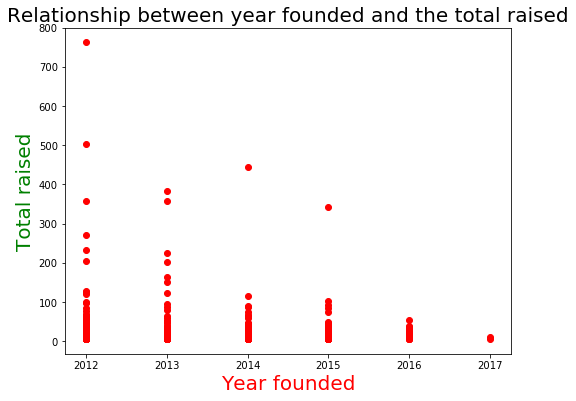

In [67]:
# create plot
plt.figure(figsize=(8,6))

# scatterplot of facebook attribute (x axis) against twitter attribute (y axis)
plt.scatter(x=pitchbk_yrFounded, y=pitchbk_total, c='red')

plt.xlabel("Year founded", color='red', size=20)
plt.ylabel("Total raised", color='green', size=20)
plt.title("Relationship between year founded and the total raised", size=20)

plt.show()
